<a href="https://colab.research.google.com/github/KimYooBin1/daily_coding/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D/%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#텐서플로 프로그래밍 : 퍼셉트론 학습

import tensorflow as tf

#OR 데이터 구축
x=[[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

#가중치 초기화
w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5))             #random.uniform([배열형태],범위)
b = tf.Variable(tf.zeros([1]))

#옵티마이저
opt=tf.keras.optimizers.Adam(learning_rate=0.1)

#전방 계산식
def forward():
  s=tf.add(tf.matmul(x,w),b)
  o=tf.tanh(s)
  return o

#손실 함수 정의
def loss():
  o=forward()
  return tf.reduce_mean((y-o)**2)

#500세대까지 학습(100세대마다 학습 정보 출력)
for i in range(500):
  opt.minimize(loss, var_list=[w,b])                          #opt.minimize(손실함수, 수정하는 가중치값)
  if(i%100==0): print('loss at epoch',i,'=',loss().numpy())   #loss().numpy() 넘파이 배열로 값 리턴

#학습된 퍼셉트론으로 OR 데이터를 예측
o=forward()
print(o)

loss at epoch 0 = 0.539426
loss at epoch 100 = 0.005552258
loss at epoch 200 = 0.0022877972
loss at epoch 300 = 0.0012927554
loss at epoch 400 = 0.0008469925
tf.Tensor(
[[-0.9628393]
 [ 0.9814292]
 [ 0.9735406]
 [ 0.9999953]], shape=(4, 1), dtype=float32)


In [5]:
#케라스 프로그래밍: 퍼셉트론 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

#OR 데이터 구축
x=[[0.0,0.0],[1.0,0.0],[0.0,1.0],[1.0,1.0]]
y=[[-1],[1],[1],[1]]

n_input=2
n_output=1

perceptron=Sequential()
perceptron.add(Dense(units=n_output, activation='tanh', input_shape=(n_input,),kernel_initializer='random_uniform', bias_initializer='zeros'))

perceptron.compile(loss='mse', optimizer=SGD(learning_rate=0.1),metrics=['mse'])
perceptron.fit(x,y,epochs=500,verbose=2)

res=perceptron.predict(x)
print(res)

Epoch 1/500
1/1 - 0s - loss: 0.9806 - mse: 0.9806 - 295ms/epoch - 295ms/step
Epoch 2/500
1/1 - 0s - loss: 0.7394 - mse: 0.7394 - 7ms/epoch - 7ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6341 - mse: 0.6341 - 6ms/epoch - 6ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5820 - mse: 0.5820 - 6ms/epoch - 6ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5503 - mse: 0.5503 - 6ms/epoch - 6ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5274 - mse: 0.5274 - 6ms/epoch - 6ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5088 - mse: 0.5088 - 7ms/epoch - 7ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4927 - mse: 0.4927 - 6ms/epoch - 6ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4781 - mse: 0.4781 - 6ms/epoch - 6ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4644 - mse: 0.4644 - 8ms/epoch - 8ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4515 - mse: 0.4515 - 7ms/epoch - 7ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4391 - mse: 0.4391 - 9ms/epoch - 9ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4272 - mse: 0.4272 - 8ms/epoch - 8ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4157 - mse:

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input = 784
n_hidden = 1024
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden, activation = 'tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist=mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)            #batch_size: size만큼 지난후 가중치 갱신 validation_data: 테스트 집합 검증

res=mlp.evaluate(x_test, y_test, verbose=0)
print("정확률은",res[1]*100)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 6s - loss: 0.0416 - accuracy: 0.8507 - val_loss: 0.0270 - val_accuracy: 0.9127 - 6s/epoch - 13ms/step
Epoch 2/30
469/469 - 6s - loss: 0.0221 - accuracy: 0.9302 - val_loss: 0.0183 - val_accuracy: 0.9439 - 6s/epoch - 12ms/step
Epoch 3/30
469/469 - 6s - loss: 0.0164 - accuracy: 0.9484 - val_loss: 0.0144 - val_accuracy: 0.9534 - 6s/epoch - 12ms/step
Epoch 4/30
469/469 - 6s - loss: 0.0137 - accuracy: 0.9578 - val_loss: 0.0131 - val_accuracy: 0.9578 - 6s/epoch - 12ms/step
Epoch 5/30
469/469 - 6s - loss: 0.0120 - accuracy: 0.9636 - val_loss: 0.0117 - val_accuracy: 0.9620 - 6s/epoch - 12ms/step
Epoch 6/30
469/469 - 6s - loss: 0.0109 - accuracy: 0.9678 - val_loss: 0.0108 - val_accuracy: 0.9655 - 6s/epoch - 12ms/step
Epoch 7/30
469/469 - 6s - loss: 0.0101 - accuracy: 0.9711 - val_loss: 0.0105 - val_accuracy: 0.9676 - 6s/epoch - 13ms/step
Epoch 8/30
469/469 - 6s - loss: 0.0093 - accuracy: 0.9739 - val_loss: 0.01

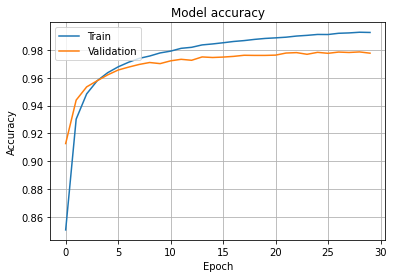

In [7]:
import matplotlib.pyplot as plt

#정확률 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper left')
plt.grid()
plt.show()

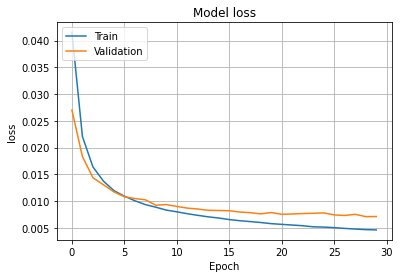

In [8]:
#손실함수 곡선
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.grid(True)
plt.show()

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = y_train.astype(np.float32)/255.0
x_test = y_test.astype(np.float32)/255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

n_input = 784
n_hidden = 1024
n_output = 10

mlp = Sequential()
mlp.add(Dense(units=n_hidden, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
#hist=mlp.fit(x_train, y_train, batch_size=128, epochs= 30, validation_data=(x_test, y_test), verbose=2)

#res=mlp.evaluate(x_test, y_test, verbose=0)
#print("정확률은",res[1]*100)

ValueError: ignored

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#MNIST를 읽어 신경망에 입력할 형태 변환
(x_train, y_trian),(x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/ 255.0
y_train = tf.keras.utils.to_categorical(y_trian, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

#신경망 구조 설정
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

#신경망 구조 설계
mlp=Sequential()
mlp.add(Dense(units=n_hidden1, activation='tanh', input_shape=(n_input,), kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden2, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden3, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_hidden4, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
mlp.add(Dense(units=n_output, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))

#신경망 학습
mlp.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
hist=mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test), verbose=2)

#신경망 정확률 측정
res=mlp.evaluate(x_test, x_test, verbose=0)
print("정확률은", res[1]*100)

Epoch 1/30
469/469 - 19s - loss: 0.0260 - accuracy: 0.8979 - val_loss: 0.0130 - val_accuracy: 0.9450 - 19s/epoch - 40ms/step
Epoch 2/30
469/469 - 17s - loss: 0.0100 - accuracy: 0.9541 - val_loss: 0.0076 - val_accuracy: 0.9630 - 17s/epoch - 36ms/step
Epoch 3/30
469/469 - 16s - loss: 0.0067 - accuracy: 0.9681 - val_loss: 0.0060 - val_accuracy: 0.9702 - 16s/epoch - 35ms/step
Epoch 4/30
469/469 - 16s - loss: 0.0051 - accuracy: 0.9769 - val_loss: 0.0060 - val_accuracy: 0.9690 - 16s/epoch - 35ms/step
Epoch 5/30
469/469 - 16s - loss: 0.0042 - accuracy: 0.9797 - val_loss: 0.0054 - val_accuracy: 0.9713 - 16s/epoch - 35ms/step
Epoch 6/30
469/469 - 16s - loss: 0.0036 - accuracy: 0.9833 - val_loss: 0.0050 - val_accuracy: 0.9740 - 16s/epoch - 35ms/step
Epoch 7/30
469/469 - 16s - loss: 0.0031 - accuracy: 0.9858 - val_loss: 0.0047 - val_accuracy: 0.9747 - 16s/epoch - 35ms/step
Epoch 8/30
469/469 - 17s - loss: 0.0028 - accuracy: 0.9876 - val_loss: 0.0043 - val_accuracy: 0.9770 - 17s/epoch - 37ms/step


ValueError: ignored